In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/bicicletas-compartidas.csv')

In [3]:
df.head()

,fecha,bicis-compartidas,temp-obs,sens-temp,hum,viento,codigo-clima,festivo,findesemana,cuartil-ano
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
y = df['bicis-compartidas'].values #variable objetivo
y = np.where(y == 0, 1, y)

In [5]:
np.max(y)

7860

In [6]:
# promedio: sum(y)/n

In [7]:
np.mean(y)

1143.1016997817849

In [8]:
np.sum(y)/len(y)

1143.1016997817849

In [9]:
scipy.stats.mstats.hmean(y) #Media armonica

241.65180305136826

In [10]:
np.median(y) #La mediana

844.0

In [11]:
#La moda no viene precargada en numpy
moda = np.nan
valores,  conteo_valores = np.unique(y , return_counts = True)
pos = np.argmax(conteo_valores)
moda = valores[pos]
moda

46

In [12]:
np.std(y)

1085.0768508213835

Revisiones

In [13]:
y_alterado = y.copy()
y_alterado[y_alterado == max(y_alterado)] = 1000000

In [14]:
print(np.mean(y))
print(np.mean(y_alterado))

1143.1016997817849
1200.075399104169


In [15]:
print(np.median(y))
print(np.median(y_alterado))

844.0
844.0


Diagramas de frecuencias

In [16]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [17]:
# Frecuencias categoricas
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: 'Cat-' + str(int(x)))

In [18]:
valor, conteo_freq = np.unique(ycat, return_counts = True)

In [19]:
tabla_frecuencias = dict(zip(valor,conteo_freq))
tabla_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [20]:
# Variable numerica
ynum = df['viento'].copy()
ynum.describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: viento, dtype: float64

In [21]:
valores = (0,25,50,75,100)
np.percentile(ynum, q = valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [22]:
valores = (0,20,40,60,80,100)
np.percentile(ynum, q = valores)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [23]:
valores = list(range(0,110,10))
np.percentile(ynum, q = valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

Valores atipicos

In [24]:
y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [25]:
#outlier
Q1 = np.percentile(ynum, q = 25)
Q3 = np.percentile(ynum, q = 75)

RI = Q3 - Q1

lim_inf = Q1 - 1.5*RI
lim_sup = Q3 + 1.5*RI


[lim_inf, lim_sup]

[-5.75, 36.25]

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

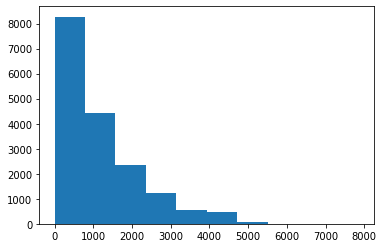

In [27]:
plt.hist(y)

Categoricas

In [28]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil-' + str(int(x)))

Text(0, 0.5, 'Frecuencia')

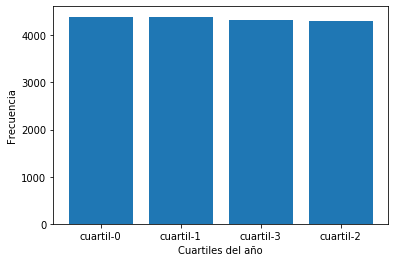

In [29]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts() )
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')

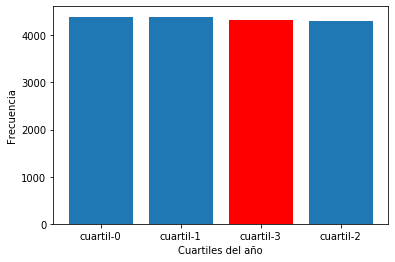

In [30]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts() )
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
ax.patches[2].set_facecolor('red')

Text(0.5, 1.0, 'Diagrama de pie')

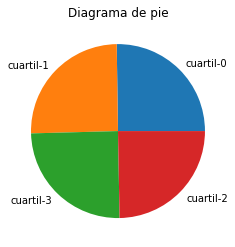

In [31]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels = y.value_counts().index)
ax.set_title('Diagrama de pie')

Numericas

In [32]:
y = df['viento']

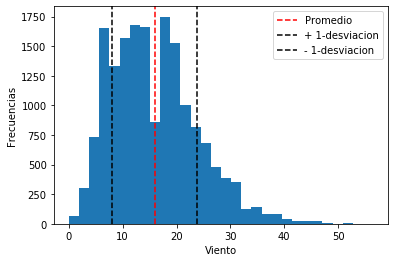

In [33]:
fig, ax = plt.subplots()
ax.hist(y, bins = 30)
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencias')
plt.axvline(np.mean(y), c = 'r', linestyle = '--', label = 'Promedio')
plt.axvline(np.mean(y) + np.std(y), c = 'k', linestyle = '--', label = '+ 1-desviacion')
plt.axvline(np.mean(y) - np.std(y), c = 'k', linestyle = '--', label = '- 1-desviacion')
ax.legend()

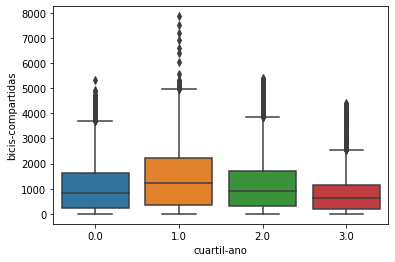

In [34]:
y = df['bicis-compartidas']

fig, ax = plt.subplots()
sns.boxplot(x = 'cuartil-ano', y = 'bicis-compartidas', data = df) # los circulos son valores outliers

Text(0, 0.5, 'Bicis-compartidas')

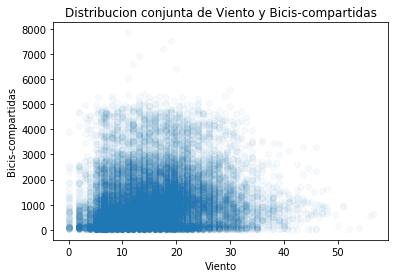

In [35]:
fig, ax = plt.subplots()
ax.scatter(df['viento'], df['bicis-compartidas'], alpha = 0.03)
ax.set_title('Distribucion conjunta de Viento y Bicis-compartidas')
ax.set_xlabel('Viento')
ax.set_ylabel('Bicis-compartidas')

# Teorema de bayes

In [36]:
df = pd.read_csv('./data/juego-azar.csv', sep = ';')
df. columns

Index(['bola', 'color', 'numero'], dtype='object')

In [37]:
df

,bola,color,numero
0,1,blanco,1
1,2,negro,1
2,3,negro,1
3,4,negro,1
4,5,blanco,2
5,6,negro,2
6,7,negro,2
7,8,blanco,3
8,9,blanco,3
9,10,negro,3


In [38]:
probabilidad_numero = df.numero.value_counts()/len(df)

In [39]:
probabilidad_color = df.color.value_counts()/len(df)

In [40]:
df.groupby(['numero', 'color']).size() #probabilidad conjunta

numero  color 
1       blanco    1
        negro     3
2       blanco    1
        negro     2
3       blanco    2
        negro     1
dtype: int64

In [41]:
#Probabilidad condicional P(A|B) = P(Blanco/numero sea 2) = 1/3
1/3

0.3333333333333333

In [42]:
#P(A)

# # P(A|B)

#P(B)

#Asumimos que esta informacione es deconocida p_blanca = 4/10

#p(p_blanca|1) + p(p_blanca|2) + p(p_blanca|3)

#1 + 1 + 2

#p(blanco) = p(p_blanca|1)*p(1) + p(p_blanca|2)*p(2) + p(p_blanca|3)*p(3)

(1/4)*(4/10) + (1/3)*(3/10) + (2/3)*(3/10)


0.4

In [43]:
4/10

0.4

# Funciones de distribucion discreta y continua

In [44]:
from scipy.stats import binom

In [45]:
p = 0.3 #probabilidad de exitos
n = 8


x = list(range(0,9,1))
y = list([])

for i in x:
    y.append(binom.pmf(i,p=p,n=n))

y

[0.05764801000000002,
 0.1976503200000001,
 0.2964754800000002,
 0.25412184,
 0.1361367,
 0.04667544000000001,
 0.010001879999999989,
 0.0012247199999999988,
 6.560999999999994e-05]

Text(0, 0.5, 'Probabilidad discreta')

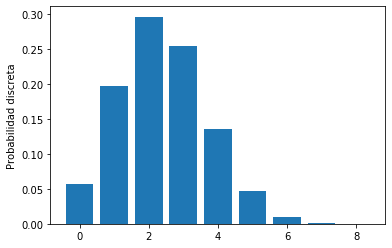

In [46]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discreta')

In [47]:
media = np.average(x, weights = y)
varianza = np.average(((x - media)**2), weights = y)
media,varianza

(2.4, 1.68)

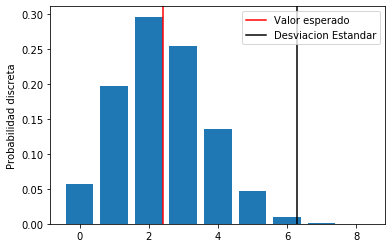

In [48]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discreta')
ax.axvline(x = media, c = 'r', label = 'Valor esperado')
ax.axvline(x = media + 3*np.sqrt(varianza), c = 'k', label = 'Desviacion Estandar')
plt.legend()

In [49]:
N = 100
x = list(range(0,N+1,1))
y = list([])

for i in x:
    y.append(binom.cdf(i,p=0.3,n=N))

y

[3.2344765096247375e-16,
 1.4185489835068493e-14,
 3.082588133121748e-13,
 4.425285341991664e-12,
 4.721295390791065e-11,
 3.992943409646157e-10,
 2.7884180388494006e-09,
 1.6538068708308797e-08,
 8.504079257936531e-08,
 3.8514796382399376e-07,
 1.5555659316780454e-06,
 5.659628935841608e-06,
 1.8704686341932912e-05,
 5.6549688047516555e-05,
 0.0001573409681001423,
 0.00040499954194373643,
 0.0009688650448912078,
 0.002162933168779963,
 0.004522639223131567,
 0.008887208316142793,
 0.016462853241869434,
 0.028831253120606814,
 0.04786573864827411,
 0.07553076730339288,
 0.11357018170418141,
 0.16313010446635196,
 0.22439923974925396,
 0.2963661605577433,
 0.37677817921620693,
 0.4623397360153615,
 0.5491236007687906,
 0.6331079860140434,
 0.7107185563076472,
 0.7792577612422589,
 0.8371417116282125,
 0.8839213939809425,
 0.9201199577062691,
 0.9469544142130749,
 0.9660210017310686,
 0.9790114239960753,
 0.9875015928335618,
 0.9928264374006265,
 0.996032211170594,
 0.9978853827186815,
 

Text(0.5, 1.0, 'Probabilidad Continua')

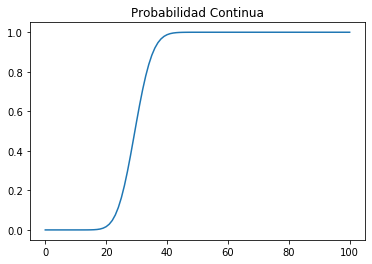

In [50]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Probabilidad Continua')

In [51]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Distribuciones de mayor aplicacion discretas

## Bernoulli

In [52]:
from scipy.stats import bernoulli 
p = 0.3
data = bernoulli.rvs(p, size = 100)

In [53]:
len(data)

100

In [54]:
mean, var, skew, kurt = bernoulli.stats(p, moments = 'mvsk')
mean, var, skew, kurt

(array(0.3), array(0.21), array(0.87287156), array(-1.23809524))

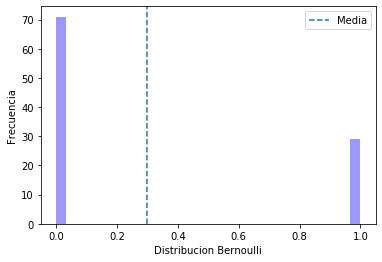

In [55]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion Bernoulli', ylabel = 'Frecuencia')
ax.axvline(x = mean,linestyle = '--', label = 'Media')
ax.legend()

## Binomial

In [56]:
from scipy.stats import binom 
p = 0.3
n = 10
data = binom.rvs(p=p, size = 100, n = n)

In [57]:
mean, var, skew, kurt = binom.stats(p = p,n = n, moments = 'mvsk')
mean, var, skew, kurt

(array(3.), array(2.1), array(0.27602622), array(-0.12380952))

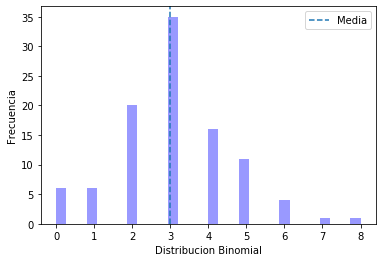

In [58]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion Binomial', ylabel = 'Frecuencia')
ax.axvline(x = mean,linestyle = '--', label = 'Media')
ax.legend()

## Geometrica

In [59]:
from scipy.stats import nbinom 
p = 0.3
n = 10
data = nbinom.rvs(p=p, size = 100, n = n)

In [60]:
mean, var, skew, kurt = nbinom.stats(p = p,n = n, moments = 'mvsk')
mean, var, skew, kurt

(array(23.33333333), array(77.77777778), array(0.6425396), array(0.61285714))

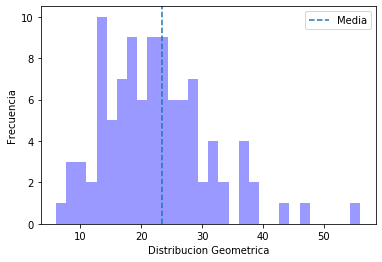

In [61]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion Geometrica', ylabel = 'Frecuencia')
ax.axvline(x = mean,linestyle = '--', label = 'Media')
ax.legend()

## Poisson

In [62]:
from scipy.stats import poisson 
lambda_p = 3
n = 10
data = poisson.rvs(mu = lambda_p, size = 100)

In [63]:
mean, var, skew, kurt = poisson.stats(mu = lambda_p, moments = 'mvsk')
mean, var, skew, kurt

(array(3.), array(3.), array(0.57735027), array(0.33333333))

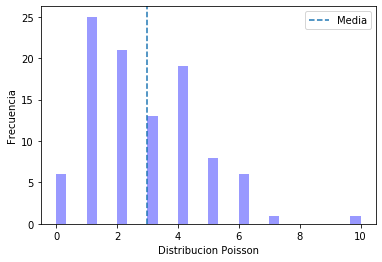

In [64]:
ax = sns.distplot(data, bins = 30, kde = False, color = 'blue')
ax.set(xlabel = 'Distribucion Poisson', ylabel = 'Frecuencia')
ax.axvline(x = mean,linestyle = '--', label = 'Media')
ax.legend()

# Distribuciones de probabilidad de funciones continuas

## Exponencial

In [65]:
from scipy.stats import expon 
data = expon.rvs(size = 10000)

In [66]:
mean, var, skew, kurt = expon.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(1.), array(1.), array(2.), array(6.))

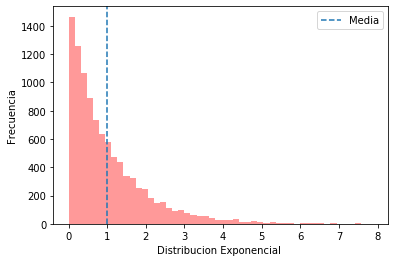

In [67]:
ax = sns.distplot(data, bins = 50, kde = False, color = 'red')
ax.set(xlabel = 'Distribucion Exponencial ', ylabel = 'Frecuencia')
ax.axvline(x = mean,linestyle = '--', label = 'Media')
ax.legend()

## Normal

In [68]:
from scipy.stats import norm 
mean = 0
var = 1
data = norm.rvs(size = 10000)

In [69]:
mean, var, skew, kurt = norm.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

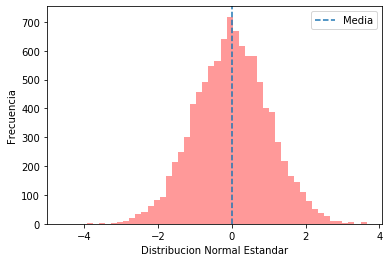

In [70]:
ax = sns.distplot(data, bins = 50, kde = False, color = 'red')
ax.set(xlabel = 'Distribucion Normal Estandar', ylabel = 'Frecuencia')
ax.axvline(x = mean,linestyle = '--', label = 'Media')
ax.legend()

## Uniforme

In [71]:
from scipy.stats import uniform 
mean = 0
var = 1
data = uniform.rvs(size = 100000)

In [72]:
mean, var, skew, kurt = uniform.stats(moments = 'mvsk')
mean, var, skew, kurt

(array(0.5), array(0.08333333), array(0.), array(-1.2))

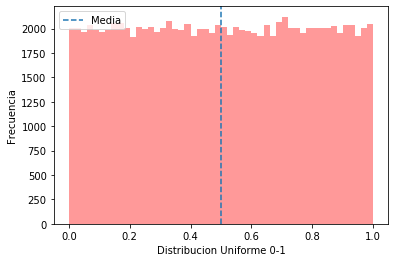

In [73]:
ax = sns.distplot(data, bins = 50, kde = False, color = 'red')
ax.set(xlabel = 'Distribucion Uniforme 0-1', ylabel = 'Frecuencia')
ax.axvline(x = mean,linestyle = '--', label = 'Media')
ax.legend()

# Estandarización, covarianza y correlación

In [74]:
df = pd.read_csv('./data/iris-data.csv',index_col = 0)

In [75]:
df.head()

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [76]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [77]:
y = df['lar.petalo'] #Estandarizacion
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: lar.petalo, Length: 150, dtype: float64

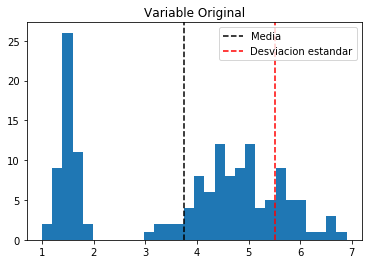

In [78]:
fig, ax = plt.subplots()
ax.set_title('Variable Original')
ax.hist(y, bins = 30)
ax.axvline(x = np.mean(y), c = 'k', label = 'Media', linestyle = '--')
ax.axvline(x = np.mean(y) +np.std(y), c = 'r', label = 'Desviacion estandar', linestyle = '--')
plt.legend()

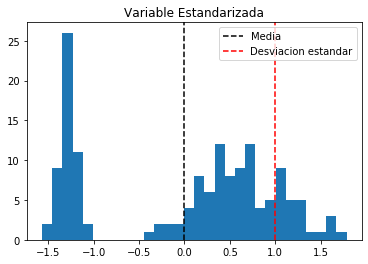

In [79]:
fig, ax = plt.subplots()
ax.set_title('Variable Estandarizada')
ax.hist((y - np.mean(y))/np.std(y), bins = 30)
ax.axvline(x = (np.mean(y - np.mean(y)))/np.std(y), c = 'k', label = 'Media', linestyle = '--')
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))) + np.std((y - np.mean(y))/np.std(y)), c = 'r', label = 'Desviacion estandar', linestyle = '--')
plt.legend()

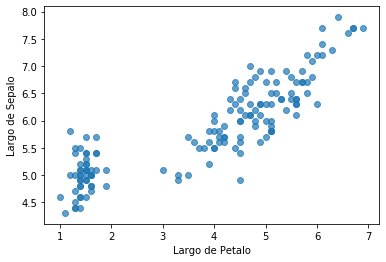

In [80]:
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'], df['lar.sepalo'], alpha = 0.7)
ax.set_xlabel('Largo de Petalo')
ax.set_ylabel('Largo de Sepalo')
ax.autoscale()

In [81]:
np.cov(df['lar.petalo'], df['lar.sepalo']) #Matriz de Covarianza

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [82]:
df.corr(method = 'spearman')

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


In [83]:
corr = df.corr(method = 'kendall')

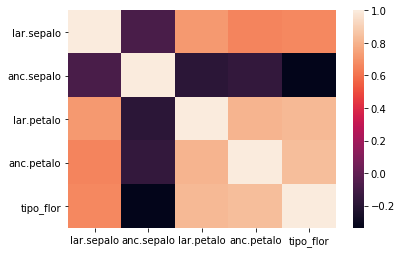

In [84]:
sns.heatmap(corr, xticklabels = corr.columns)

# Estimadores a través de datos

In [85]:
from scipy.stats import norm

In [86]:
x1 = 3
x2 = 10

#Hipotesis de parametros poblacionales
mu1 = 4
mu2 = 7
sigma = 1

p_muestra = norm.pdf(x1, mu1, sigma)*norm.pdf(x2, mu1, sigma)
p_muestra

1.4701857752651781e-09

In [87]:
muestra_10 = norm.rvs(5, sigma, size = 10)
muestra_10

array([4.6347308 , 4.7486302 , 4.23033391, 3.73191002, 6.65749302,
       5.22928867, 5.21533348, 4.25568267, 5.88435121, 5.30166155])

In [88]:
data1 = norm.rvs(mu1, sigma, size = 10000)
data2 = norm.rvs(mu2, sigma, size = 10000)

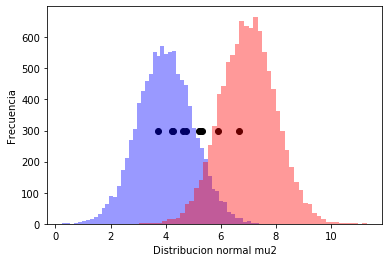

In [91]:
ax = sns.distplot(data1, bins = 50, color = 'blue', kde = False)
ax.set(xlabel = 'Distribucion normal mu1', ylabel = 'Frecuencia')

ax = sns.distplot(data2, bins = 50, color = 'red', kde = False)
ax.set(xlabel = 'Distribucion normal mu2', ylabel = 'Frecuencia')

ax.scatter(muestra_10, y, color = 'k')
#ax.set(xlabel = 'Distribucion normal mu2', ylabel = 'Frecuencia')

In [90]:
muestra_10
y = []
for i in range(10):
    y.append(300)

# Distribuciones muestrales

In [92]:
from IPython.core.display import Image

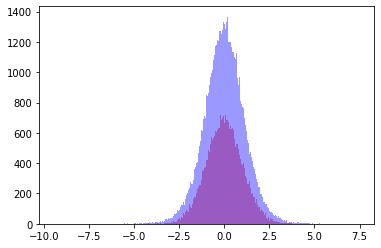

In [93]:
from scipy.stats import t

data1 = t.rvs(100, size = 100000)
data2 = t.rvs(10, size = 100000)

ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')
ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')

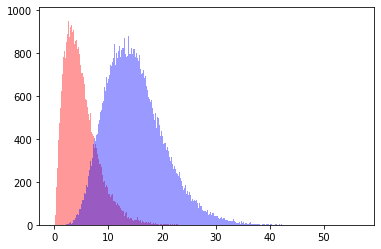

In [94]:
from scipy.stats import chi2

data1 = chi2.rvs(5, size = 100000)
data2 = chi2.rvs(15, size = 100000)

ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')
ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')

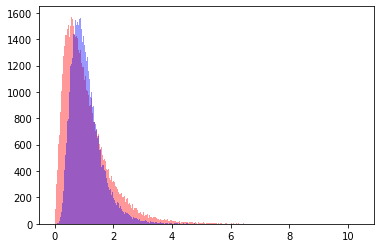

In [95]:
from scipy.stats import f

data1 = f.rvs( 5,25,size = 100000)
data2 = f.rvs(15,25,size = 100000)

ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')
ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')

In [96]:
f.pdf(4,15,25,)

0.0019800859524222187

In [97]:
f.cdf(4,15,25) #Probabilidd acumulada

0.9988900520089906

In [98]:
f.ppf(0.9988,15,25)

3.9563867602466956

# Teorema del limite central

In [99]:
from scipy.stats import expon
from scipy.stats import uniform

In [100]:
poblacion = pd.DataFrame()
poblacion['Numbers'] = expon.rvs(40, size = 100000)

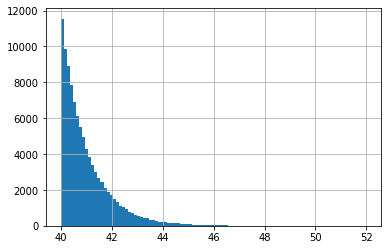

In [101]:
poblacion['Numbers'].hist(bins = 100)

In [102]:
muestras_promedio = []
tamano = 5000
for i in range(0, tamano):
    muestras_promedio.append(poblacion.sample(n = 100).mean().values[0])

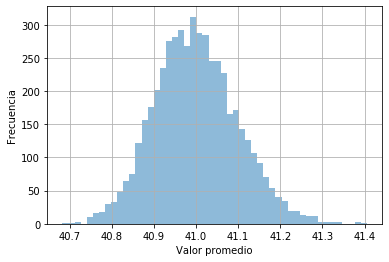

In [103]:
fig, ax = plt.subplots()
ax.hist(muestras_promedio, bins = 50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()

# Prueba de hipotesis

## Caso ejemplo:

-La empresa Mustage.S.A está desarrollando una plataforma para otorgar creditos de bajo monto.

-El tiempo para completar exitosamente una consulta de informacion de clientes ante las fuenes de buro no debe ser superior a los 30 segundo

-Muestra de n = 50 clientes consultados

-La empresa esta dispuesta a asumir un error del 5% en la prueba

¿El proveedor de informacion satisface estadisticamente este requerimento?

In [104]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [105]:
len(muestra)

50

In [106]:
# Hipotesis

from scipy.stats import expon
media, var, skew, kurt = expon.stats(scale = 30, moments = 'mvsk')

In [107]:
# Paso 1: parametro a probar  
# Paso 2: Hipotesis nula 

mu = 30 #Hipotesis nula
mu > 30 #Hipotesis ALterna

# Paso 3: Mejor estimador (varianza muestral o media muestral)
# Estimador 

promedio = np.mean(muestra)
promedio

40.66

In [108]:
# Paso 4: Identificar el estadistico y la distribucion
# Paso 5: Valor del estadistico
z = (promedio - mu)/np.sqrt(var/50)  
z

2.5125860958161983

In [109]:
# Paso 6 valor del error

alpha = 0.05

#Creterios de rechazo
data_normal = norm.rvs(size = 100000)

Text(0.5, 1.0, 'Distribuicion normal')

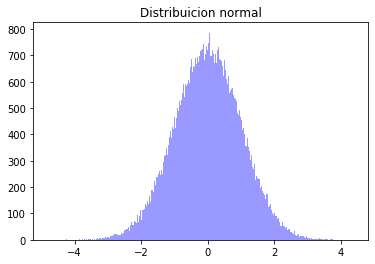

In [110]:
ax = sns.distplot(data_normal, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribuicion normal')

In [111]:
valor_critico = norm.ppf(1-alpha, loc = 0, scale = 1)
valor_critico

1.6448536269514722

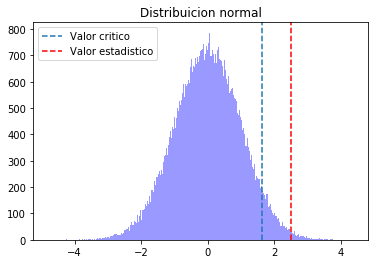

In [112]:
ax = sns.distplot(data_normal, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribuicion normal')
ax.axvline(x = valor_critico, linestyle = '--', label = 'Valor critico')
ax.axvline(x = z, linestyle = '--', label = 'Valor estadistico', color = 'r')

ax.legend()

# Errores estadisticos

## Error de tipo 1(Alfa)

- Rechazar $H_{0}$ dado que $H_0$ es verdadera
- Rechazar $H_{0}$ cuando en realidad es cierta. $\alpha = P(Rechazar  H_0|H_0 es cierta)$

## Error de tipo 2 (Beta)

- No rechazar $H_{0}$ dado que $H_{1}$ es verdadera
- No rechazar $H_0$ cuando en realidad es falsa $\beta = P(No  rechazar  H_0|H_0 es falsa)$

In [113]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [114]:
mu1 = 37
mu2 = 42

promedio = np.mean(muestra)
promedio

desv = 2

z_1 = ((promedio - mu1))/desv
z_2 = ((promedio - mu2))/desv

In [115]:
from scipy.stats import norm

data1 = norm.rvs(scale = desv,loc = mu1,size = 1000000)
data2 = norm.rvs(scale = desv,loc = mu2,size = 1000000)

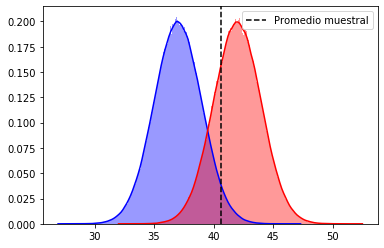

In [116]:
ax = sns.distplot(data1, bins = 500, kde = True, color = 'b')
ax = sns.distplot(data2, bins = 500, kde = True, color = 'r')
ax.axvline(x=promedio, c = 'k', linestyle = '--', label = 'Promedio muestral')
ax.legend()

Observamos que nuestro promedio es mas probable bajo la hipotesis 2

In [117]:
# Error tipo 1: p rechazar H0 cuando esta es verdadera
p_prom_mu1 = norm.cdf(z_1)
1 - p_prom_mu1

0.03362496941962845

In [118]:
# Error tipo 2: probabilidad de No rechazar H0 cuando esta es falsa
p_prom_mu2 = norm.cdf(z_2)
p_prom_mu2

0.2514288950953095

# Intervalos de confianza

## Pasos y elementos de un intervalo de confianza

- Parametro a probar $(\theta, \lambda, \mu, \sigma^2, \sigma)$

- Identificar el estimador (Promedio muestral o varianza muestral)

- Identificar el estadistico y su distribucion

- Tolerancia al error alfa, estimacion puntual y rango de error

- Conclusion del intervalo

- Opcional: Pruebas de hipotesis usando intervalos de confianza

In [119]:
muestra = [4046, 2578, 3796, 3412, 3315, 3228, 3666, 3877, 3154, 4062, 4365, 3776, 3761, 2587, 2911, 3184, 3810, 4459, 3385, 3899, 3602, 2701, 2821, 2790, 2557, 2540, 4119, 2712, 2743, 2713, 4466, 3937, 3871, 4427, 3177, 2556, 2903, 3522, 4155, 4010, 4453, 3080, 3008, 3865, 3356, 2799, 3308, 2759, 4347, 2576, 4075, 3333, 2936, 3746, 3334, 3940, 4113, 4220, 3580, 3922]

In [120]:
alpha = 0.05

In [121]:
lim_inf = norm.ppf(alpha/2)
lim_sup = norm.ppf(1 - (alpha/2))

In [122]:
lim_inf, lim_sup

(-1.9599639845400545, 1.959963984540054)

In [123]:
promedio = np.mean(muestra)
desv = np.std(muestra)
len(muestra)

60

In [124]:
#Ajustamos los limites (Desestandarizamos)
lim_inf = lim_inf*desv + promedio
lim_sup = lim_sup*desv + promedio
lim_inf, lim_sup

(2306.73126667925, 4638.035399987416)

# Regresion lineal

In [125]:
import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import metrics

In [126]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)

In [127]:
df

,salario,noasiat,gpa,postgrad,experien
0,99026.0,0.0,3.36,0.0,15.0
1,69190.0,1.0,2.35,1.0,9.0
2,95453.0,1.0,3.33,1.0,10.0
3,57695.0,1.0,3.37,0.0,2.0
4,94364.0,1.0,3.87,1.0,4.0
...,...,...,...,...,...
105,80765.0,1.0,3.12,1.0,2.0
106,77081.0,0.0,3.36,0.0,5.0
107,60024.0,0.0,2.51,1.0,3.0
108,71606.0,1.0,2.89,0.0,8.0


In [128]:
y = df['salario']
X = df.drop(['salario','noasiat','postgrad'], axis = 1)

In [129]:
X

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [130]:
reg_lin = sm.OLS(y,sm.add_constant(X)).fit()

In [131]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           7.37e-38
Time:                        23:25:59   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

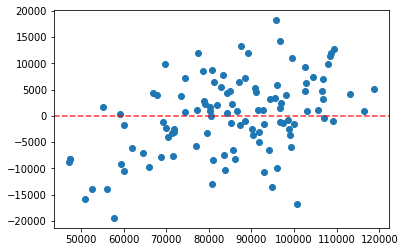

In [132]:
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(X))
ax.scatter(y,y - y_pred)
plt.axhline(y = 0, color = 'red', alpha = 0.8, linestyle = '--')

# Regresion Logistica

In [133]:
arc = './data/compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)

In [134]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [135]:
y = np.where(df['salario']>96000,1,0)
X = df.drop('salario', axis = 1)

In [136]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'y')

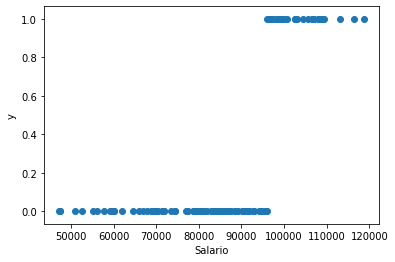

In [137]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel('Salario')
ax.set_ylabel('y')

In [138]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X, y)
y_estimado_1 = reg_log.predict_proba(X)[:,1]
y_estimado = reg_log.predict(X)

In [139]:
y_estimado == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [140]:
metrics.accuracy_score(y, reg_log.predict(X))

0.9090909090909091

# Arbol de regresion y de clasificacion

In [154]:
from sklearn.tree import DecisionTreeClassifier # Importar el clasificador
from sklearn.model_selection import train_test_split # Importar funciones de particion

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import os

In [155]:
df = pd.read_csv('./data/rating-peliculas.csv')

In [156]:
df.head()

,pelicula,genero,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [157]:
df.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [158]:
y = df.genero
y.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [159]:
X = df.drop(['pelicula','genero'], axis = 1)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [161]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [162]:
y_pred

array(['Comedy', 'Drama', 'Action', 'Comedy', 'Comedy', 'Action',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Comedy',
       'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Action', 'Drama', 'Action', 'Comedy', 'Comedy', 'Drama', 'Action',
       'Comedy', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Action',
       'Comedy', 'Comedy', 'Action', 'Drama', 'Drama', 'Comedy', 'Action',
       'Comedy', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy',
       'Comedy', 'Drama', 'Action', 'Action', 'Drama', 'Comedy', 'Comedy',
       'Comedy', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Action', 'Comedy',
       'Action', 'Action', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama',
       'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Action',
       'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Drama', 'Action', 'Drama', 'Comedy', 'Drama', 'Comedy',
       

In [165]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
               special_characters = True, feature_names = X.columns, class_names = y.value_counts().index)
grap = pydotplus.graph_from_dot_data(dot_data.getvalue())
grap.write_png('Peliculas.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [164]:
metrics.accuracy_score(y_test, y_pred)

0.375